## Medical Sentiment Analysis - Visualization and Statistics 

Sentiment analysis is a process of gathering data from emotions expressed by users towards a specific target of products or services. It uses Natural Language Processing techniques to identify a feeling by a customer review.

![](https://elimufeynman.s3.amazonaws.com/media/resources/Drugs_1.JPG)

### Prepare Workspace

In [1]:
# Upload libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import string
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from nltk.util import ngrams
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/kuc-hackathon-winter-2018/drugsComTrain_raw.csv
/kaggle/input/kuc-hackathon-winter-2018/drugsComTest_raw.csv


In [2]:
# Upload datasets
train = pd.read_csv("../input/kuc-hackathon-winter-2018/drugsComTrain_raw.csv")
test = pd.read_csv("../input/kuc-hackathon-winter-2018/drugsComTest_raw.csv")

## Summarize Data

In [3]:
train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [4]:
test.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [5]:
train.shape

(161297, 7)

In [6]:
test.shape

(53766, 7)

In [7]:
train.dtypes

uniqueID        int64
drugName       object
condition      object
review         object
rating          int64
date           object
usefulCount     int64
dtype: object

In [8]:
test.dtypes

uniqueID        int64
drugName       object
condition      object
review         object
rating          int64
date           object
usefulCount     int64
dtype: object

### Generate Sentiment feature

In [9]:
# Generate sentiment
train['sentiment'] = np.where(train['rating']>=6,'Positive','Negative')
test['sentiment'] = np.where(test['rating']>=6,'Positive','Negative')

In [10]:
train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,sentiment
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,Positive
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,Positive
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,Negative
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,Positive
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,Positive


In [11]:
test.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,sentiment
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22,Positive
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17,Positive
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3,Positive
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35,Positive
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4,Positive


In [12]:
# Split positive/negative rating
train_pos = train[train['sentiment'] == 'Positive']
train_neg = train[train['sentiment'] == 'Negative']
test_pos = test[test['sentiment'] == 'Positive']
test_neg = test[test['sentiment'] == 'Negative']
data = pd.concat([train,test])
data_pos = pd.concat([train_pos,test_pos])
data_neg = pd.concat([train_neg,test_neg])

## Visualization

A wordcloud is a visualization method. The most frequent words are in large size and the less frequent words are in smaller size.

In [13]:
# Wordcloud
def plot_wordcloud(text, background_color, mask=None, max_words=1000, max_font_size=120, figure_size=(25.0,15.0), 
                   title = None, title_size=30, image_color=False):

    wordcloud = WordCloud(background_color=background_color,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=1000, 
                    height=500,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()   

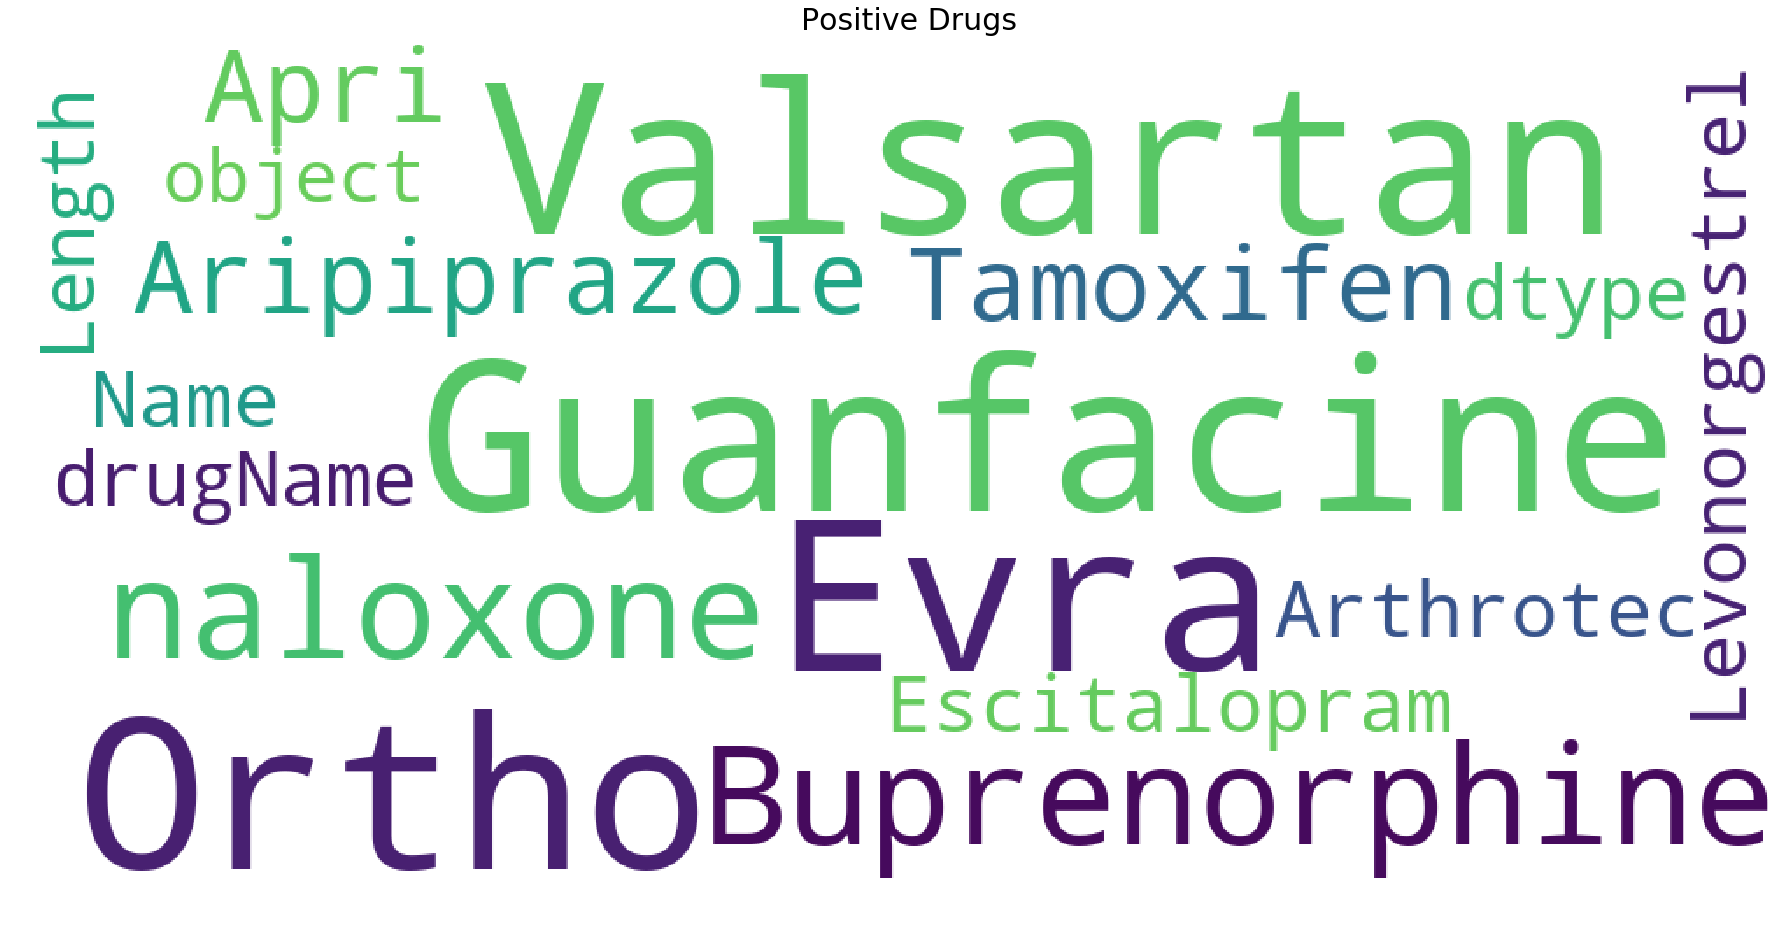

In [14]:
plot_wordcloud(data_pos["drugName"], background_color='white',title="Positive Drugs")

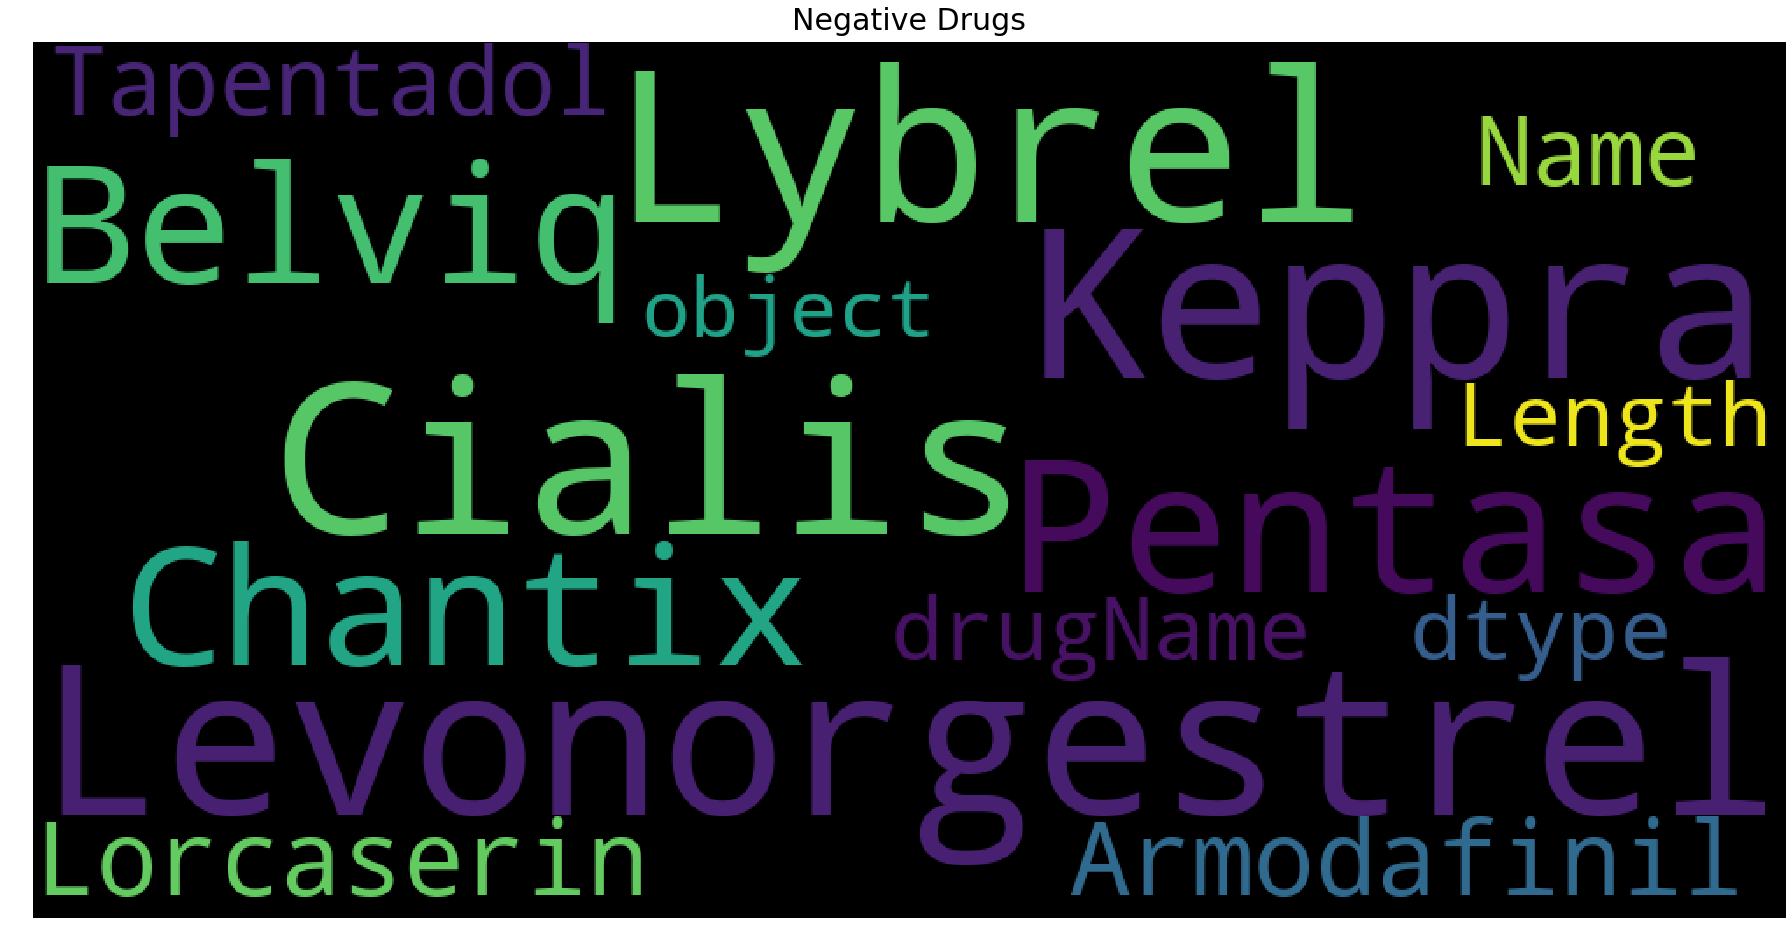

In [15]:
plot_wordcloud(data_neg["drugName"], background_color='black', title="Negative Drugs")

Text(0.5, 1.0, 'Distribution of drugs per sentiment')

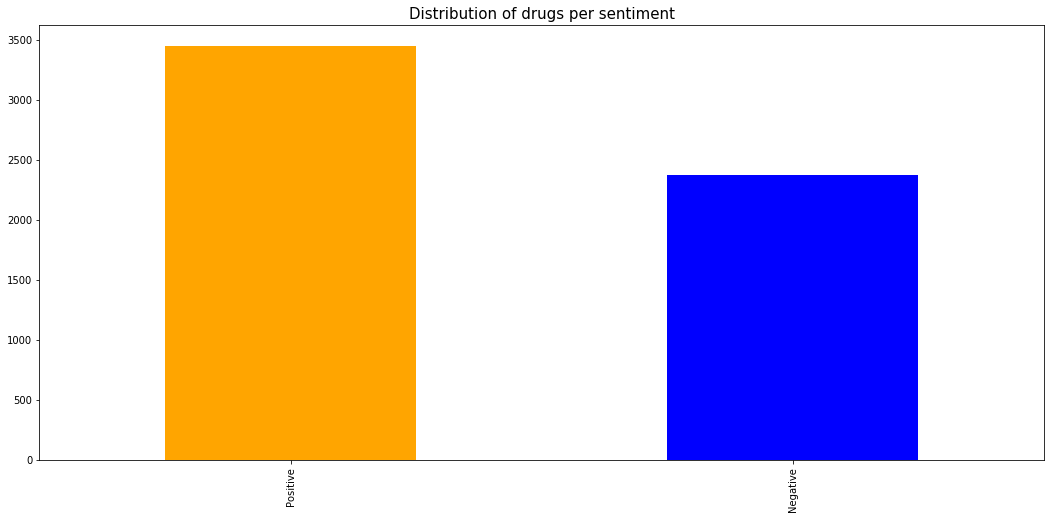

In [16]:
condition_dn = data.groupby(['sentiment'])['drugName'].nunique().sort_values(ascending=False)
condition_dn[0:20].plot(kind="bar", figsize = (18,8), fontsize = 10,color=("orange","blue"))
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Distribution of drugs per sentiment", fontsize = 15)

Text(0.5, 1.0, 'Top10 : Number of drugs per condition')

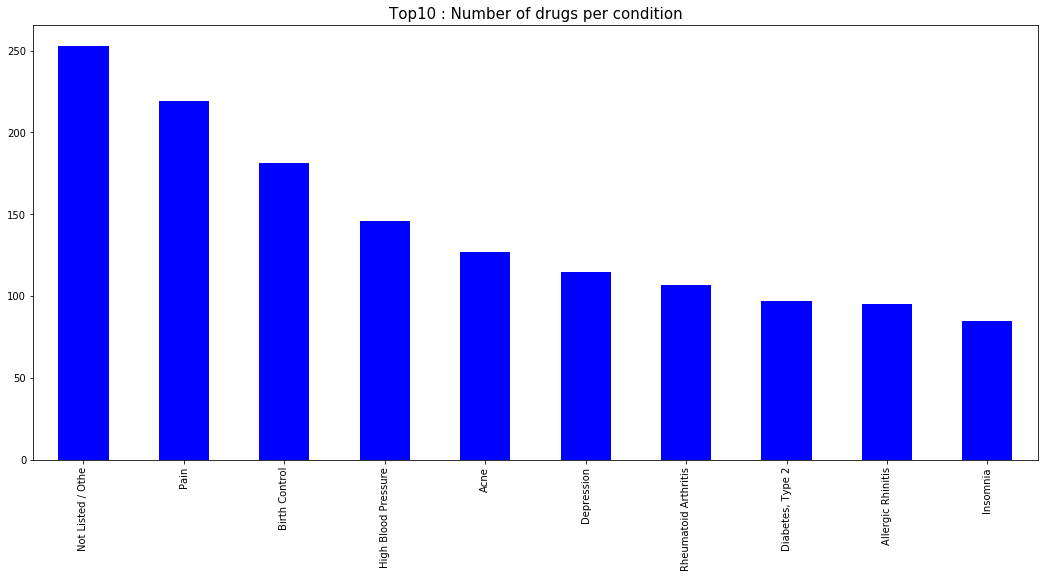

In [17]:
condition_dn = data.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
condition_dn[0:10].plot(kind="bar", figsize = (18,8), fontsize = 10,color="blue")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Top10 : Number of drugs per condition", fontsize = 15)

## N-Grams

N-grams afford to capture the language structure because they are the combination of multiple words used together. 

In [18]:
def Most_Common(lst):
    data = Counter(lst)
    return data.most_common(10)

### Positive N-grams

In [19]:
# Positive
s = data_pos['review'].str.cat(sep=' ')
s = s.lower()
s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s)
string_list = [a for a in string.punctuation]
all_stopwords = stopwords.words('english') + string_list + ['\r\n\r\nwhen','\r\nwe','2nd','b','1','2','3','4','5','6','7','8','10','20','48hrs','mg','2mg','039','15','bi',
                                                            '5mg','2x','21','rx','bc','24','25','7pm','28','58','lbs','25mg','50mg','2016','2013','x','300mg','2008']
tokens = [token for token in s.split(" ") if token != ""]
tokens = [a for a in tokens if a not in all_stopwords ]


### 1-grams

In [20]:
unigrams_pos = list(ngrams(tokens, 1))

In [21]:
unigrams_pos

[('side',),
 ('effect',),
 ('take',),
 ('combination',),
 ('bystolic',),
 ('fish',),
 ('oil',),
 ('son',),
 ('halfway',),
 ('fourth',),
 ('week',),
 ('intuniv',),
 ('became',),
 ('concerned',),
 ('began',),
 ('last',),
 ('week',),
 ('started',),
 ('taking',),
 ('highest',),
 ('dose',),
 ('two',),
 ('days',),
 ('could',),
 ('hardly',),
 ('get',),
 ('bed',),
 ('cranky',),
 ('slept',),
 ('nearly',),
 ('hours',),
 ('drive',),
 ('home',),
 ('school',),
 ('vacation',),
 ('unusual',),
 ('called',),
 ('doctor',),
 ('monday',),
 ('morning',),
 ('said',),
 ('stick',),
 ('days',),
 ('see',),
 ('school',),
 ('getting',),
 ('morning',),
 ('last',),
 ('two',),
 ('days',),
 ('problem',),
 ('free',),
 ('much',),
 ('agreeable',),
 ('ever',),
 ('less',),
 ('emotional',),
 ('good',),
 ('thing',),
 ('less',),
 ('cranky',),
 ('remembering',),
 ('things',),
 ('overall',),
 ('behavior',),
 ('better',),
 ('tried',),
 ('many',),
 ('different',),
 ('medications',),
 ('far',),
 ('effective',),
 ('first',),
 ('ti

In [22]:
Most_Common(unigrams_pos)

[(('day',), 55617),
 (('side',), 53235),
 (('years',), 50589),
 (('taking',), 47025),
 (('effects',), 45017),
 (('take',), 44654),
 (('first',), 43191),
 (('pain',), 42359),
 (('started',), 38538),
 (('get',), 38513)]

### 2-grams

In [23]:
bigrams_pos = list(ngrams(tokens, 2))

In [24]:
bigrams_pos

[('side', 'effect'),
 ('effect', 'take'),
 ('take', 'combination'),
 ('combination', 'bystolic'),
 ('bystolic', 'fish'),
 ('fish', 'oil'),
 ('oil', 'son'),
 ('son', 'halfway'),
 ('halfway', 'fourth'),
 ('fourth', 'week'),
 ('week', 'intuniv'),
 ('intuniv', 'became'),
 ('became', 'concerned'),
 ('concerned', 'began'),
 ('began', 'last'),
 ('last', 'week'),
 ('week', 'started'),
 ('started', 'taking'),
 ('taking', 'highest'),
 ('highest', 'dose'),
 ('dose', 'two'),
 ('two', 'days'),
 ('days', 'could'),
 ('could', 'hardly'),
 ('hardly', 'get'),
 ('get', 'bed'),
 ('bed', 'cranky'),
 ('cranky', 'slept'),
 ('slept', 'nearly'),
 ('nearly', 'hours'),
 ('hours', 'drive'),
 ('drive', 'home'),
 ('home', 'school'),
 ('school', 'vacation'),
 ('vacation', 'unusual'),
 ('unusual', 'called'),
 ('called', 'doctor'),
 ('doctor', 'monday'),
 ('monday', 'morning'),
 ('morning', 'said'),
 ('said', 'stick'),
 ('stick', 'days'),
 ('days', 'see'),
 ('see', 'school'),
 ('school', 'getting'),
 ('getting', 'morn

In [25]:
Most_Common(bigrams_pos)

[(('side', 'effects'), 41609),
 (('birth', 'control'), 12431),
 (('weight', 'gain'), 7793),
 (('side', 'effect'), 7510),
 (('started', 'taking'), 7141),
 (('mood', 'swings'), 5883),
 (('feel', 'like'), 5670),
 (('years', 'ago'), 5540),
 (('first', 'time'), 4823),
 (('much', 'better'), 4700)]

### 3-grams

In [26]:
trigrams_pos = list(ngrams(tokens, 3))

In [27]:
trigrams_pos

[('side', 'effect', 'take'),
 ('effect', 'take', 'combination'),
 ('take', 'combination', 'bystolic'),
 ('combination', 'bystolic', 'fish'),
 ('bystolic', 'fish', 'oil'),
 ('fish', 'oil', 'son'),
 ('oil', 'son', 'halfway'),
 ('son', 'halfway', 'fourth'),
 ('halfway', 'fourth', 'week'),
 ('fourth', 'week', 'intuniv'),
 ('week', 'intuniv', 'became'),
 ('intuniv', 'became', 'concerned'),
 ('became', 'concerned', 'began'),
 ('concerned', 'began', 'last'),
 ('began', 'last', 'week'),
 ('last', 'week', 'started'),
 ('week', 'started', 'taking'),
 ('started', 'taking', 'highest'),
 ('taking', 'highest', 'dose'),
 ('highest', 'dose', 'two'),
 ('dose', 'two', 'days'),
 ('two', 'days', 'could'),
 ('days', 'could', 'hardly'),
 ('could', 'hardly', 'get'),
 ('hardly', 'get', 'bed'),
 ('get', 'bed', 'cranky'),
 ('bed', 'cranky', 'slept'),
 ('cranky', 'slept', 'nearly'),
 ('slept', 'nearly', 'hours'),
 ('nearly', 'hours', 'drive'),
 ('hours', 'drive', 'home'),
 ('drive', 'home', 'school'),
 ('home', 

In [28]:
Most_Common(trigrams_pos)

[(('feel', 'much', 'better'), 1177),
 (('bad', 'side', 'effects'), 1157),
 (('negative', 'side', 'effects'), 1079),
 (('birth', 'control', 'pills'), 879),
 (('high', 'blood', 'pressure'), 851),
 (('experienced', 'side', 'effects'), 819),
 (('side', 'effects', 'except'), 734),
 (('anxiety', 'panic', 'attacks'), 726),
 (('would', 'recommend', 'anyone'), 719),
 (('side', 'effects', 'first'), 709)]

### Negative N-grams

In [29]:
# Negative
s = data_neg['review'].str.cat(sep=' ')
s = s.lower()
s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s)
string_list = [a for a in string.punctuation]
all_stopwords = stopwords.words('english') + string_list + ['\r\n\r\nwhen','\r\nwe','2nd','b','1','2','3','4','5','6','7','8','10','20','48hrs','mg','2mg','039','15','bi',
                                                            '5mg','2x','21','rx','bc','24','25','7pm','28','58','lbs','25mg','50mg','2016','2013','x','300mg','2008']
tokens = [token for token in s.split(" ") if token != ""]
tokens = [a for a in tokens if a not in all_stopwords ]


### 1-grams

In [30]:
unigrams_neg = list(ngrams(tokens, 1))

In [31]:
unigrams_neg

[('used',),
 ('take',),
 ('another',),
 ('oral',),
 ('contraceptive',),
 ('pill',),
 ('cycle',),
 ('happy',),
 ('light',),
 ('periods',),
 ('max',),
 ('days',),
 ('side',),
 ('effects',),
 ('contained',),
 ('hormone',),
 ('gestodene',),
 ('available',),
 ('us',),
 ('switched',),
 ('lybrel',),
 ('ingredients',),
 ('similar',),
 ('pills',),
 ('ended',),
 ('started',),
 ('lybrel',),
 ('immediately',),
 ('first',),
 ('day',),
 ('period',),
 ('instructions',),
 ('said',),
 ('period',),
 ('lasted',),
 ('two',),
 ('weeks',),
 ('taking',),
 ('second',),
 ('pack',),
 ('two',),
 ('weeks',),
 ('third',),
 ('pack',),
 ('things',),
 ('got',),
 ('even',),
 ('worse',),
 ('third',),
 ('period',),
 ('lasted',),
 ('two',),
 ('weeks',),
 ('end',),
 ('third',),
 ('week',),
 ('still',),
 ('daily',),
 ('brown',),
 ('discharge',),
 ('\r\nthe',),
 ('positive',),
 ('side',),
 ('side',),
 ('effects',),
 ('idea',),
 ('period',),
 ('free',),
 ('tempting',),
 ('alas',),
 ('day',),
 ('started',),
 ('work',),
 ('roc

In [32]:
Most_Common(unigrams_neg)

[(('day',), 21477),
 (('taking',), 21203),
 (('months',), 19460),
 (('like',), 18323),
 (('pain',), 18165),
 (('started',), 17879),
 (('side',), 17718),
 (('days',), 16951),
 (('get',), 16612),
 (('first',), 16604)]

### 2-grams

In [33]:
bigrams_neg = list(ngrams(tokens, 2))

In [34]:
bigrams_neg

[('used', 'take'),
 ('take', 'another'),
 ('another', 'oral'),
 ('oral', 'contraceptive'),
 ('contraceptive', 'pill'),
 ('pill', 'cycle'),
 ('cycle', 'happy'),
 ('happy', 'light'),
 ('light', 'periods'),
 ('periods', 'max'),
 ('max', 'days'),
 ('days', 'side'),
 ('side', 'effects'),
 ('effects', 'contained'),
 ('contained', 'hormone'),
 ('hormone', 'gestodene'),
 ('gestodene', 'available'),
 ('available', 'us'),
 ('us', 'switched'),
 ('switched', 'lybrel'),
 ('lybrel', 'ingredients'),
 ('ingredients', 'similar'),
 ('similar', 'pills'),
 ('pills', 'ended'),
 ('ended', 'started'),
 ('started', 'lybrel'),
 ('lybrel', 'immediately'),
 ('immediately', 'first'),
 ('first', 'day'),
 ('day', 'period'),
 ('period', 'instructions'),
 ('instructions', 'said'),
 ('said', 'period'),
 ('period', 'lasted'),
 ('lasted', 'two'),
 ('two', 'weeks'),
 ('weeks', 'taking'),
 ('taking', 'second'),
 ('second', 'pack'),
 ('pack', 'two'),
 ('two', 'weeks'),
 ('weeks', 'third'),
 ('third', 'pack'),
 ('pack', 'th

In [35]:
Most_Common(bigrams_neg)

[(('side', 'effects'), 13841),
 (('birth', 'control'), 7979),
 (('mood', 'swings'), 4503),
 (('weight', 'gain'), 3389),
 (('sex', 'drive'), 3158),
 (('feel', 'like'), 2963),
 (('started', 'taking'), 2656),
 (('felt', 'like'), 2651),
 (('side', 'effect'), 2194),
 (('stopped', 'taking'), 2051)]

### 3-grams

In [36]:
trigrams_neg = list(ngrams(tokens, 3))

In [37]:
trigrams_neg

[('used', 'take', 'another'),
 ('take', 'another', 'oral'),
 ('another', 'oral', 'contraceptive'),
 ('oral', 'contraceptive', 'pill'),
 ('contraceptive', 'pill', 'cycle'),
 ('pill', 'cycle', 'happy'),
 ('cycle', 'happy', 'light'),
 ('happy', 'light', 'periods'),
 ('light', 'periods', 'max'),
 ('periods', 'max', 'days'),
 ('max', 'days', 'side'),
 ('days', 'side', 'effects'),
 ('side', 'effects', 'contained'),
 ('effects', 'contained', 'hormone'),
 ('contained', 'hormone', 'gestodene'),
 ('hormone', 'gestodene', 'available'),
 ('gestodene', 'available', 'us'),
 ('available', 'us', 'switched'),
 ('us', 'switched', 'lybrel'),
 ('switched', 'lybrel', 'ingredients'),
 ('lybrel', 'ingredients', 'similar'),
 ('ingredients', 'similar', 'pills'),
 ('similar', 'pills', 'ended'),
 ('pills', 'ended', 'started'),
 ('ended', 'started', 'lybrel'),
 ('started', 'lybrel', 'immediately'),
 ('lybrel', 'immediately', 'first'),
 ('immediately', 'first', 'day'),
 ('first', 'day', 'period'),
 ('day', 'period

In [38]:
Most_Common(trigrams_neg)

[(('bad', 'side', 'effects'), 468),
 (('birth', 'control', 'pills'), 410),
 (('taking', 'birth', 'control'), 389),
 (('birth', 'control', 'pill'), 377),
 (('high', 'blood', 'pressure'), 362),
 (('ortho', 'tri', 'cyclen'), 354),
 (('every', 'single', 'day'), 333),
 (('horrible', 'side', 'effects'), 316),
 (('birth', 'control', 'ever'), 292),
 (('negative', 'side', 'effects'), 279)]